In [1]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt

In [2]:
dg = pd.read_csv('dengue.csv', low_memory=False)

In [3]:
dg

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


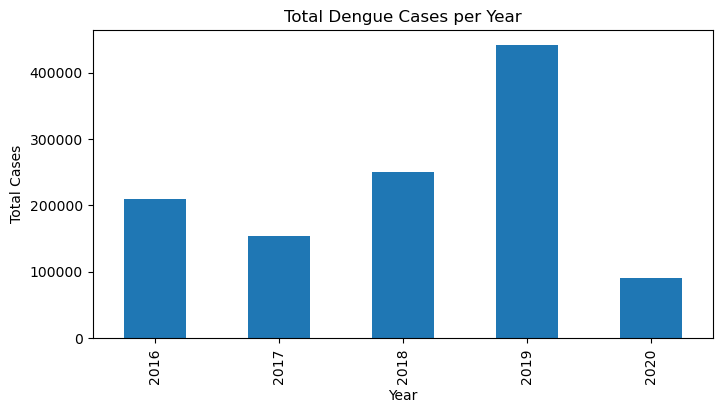

In [5]:
cases_per_year = dg.groupby('Year')['Dengue_Cases'].sum()
cases_per_year.plot(kind='bar', figsize=(8,4))
plt.title('Total Dengue Cases per Year')
plt.ylabel('Total Cases')
plt.show()

<h1> Insight 1: Some years show sharp spikes in dengue cases, indicating outbreak years needing attention.<h1>

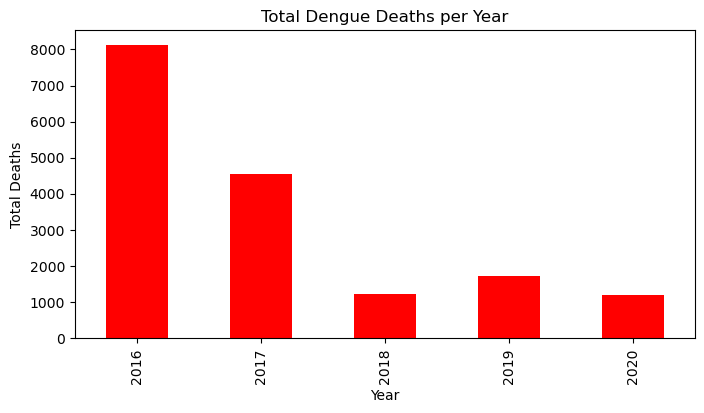

In [6]:
deaths_per_year = dg.groupby('Year')['Dengue_Deaths'].sum()
deaths_per_year.plot(kind='bar', color='red', figsize=(8,4))
plt.title('Total Dengue Deaths per Year')
plt.ylabel('Total Deaths')
plt.show()

<h1>Insight 2: Comparing deaths and cases by year helps identify when the disease was most lethal.<h1>

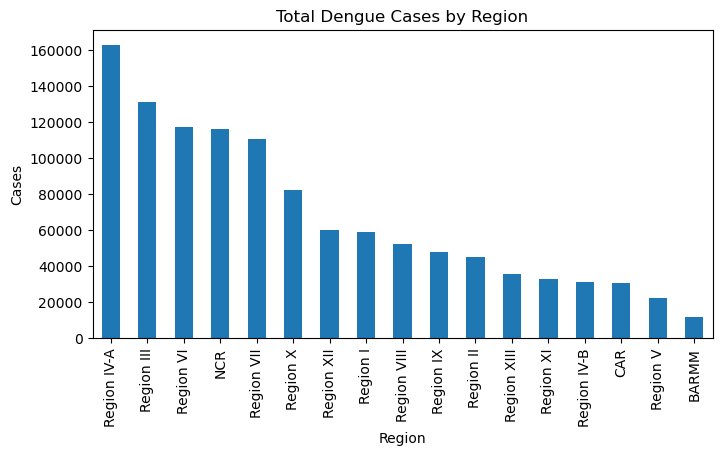

In [7]:
region_cases = dg.groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=False)
region_cases.plot(kind='bar', figsize=(8,4))
plt.title('Total Dengue Cases by Region')
plt.ylabel('Cases')
plt.show()

<h1>Insight 3: The top region contributes the largest share of total dengue infections a hotspot zone.<h1>

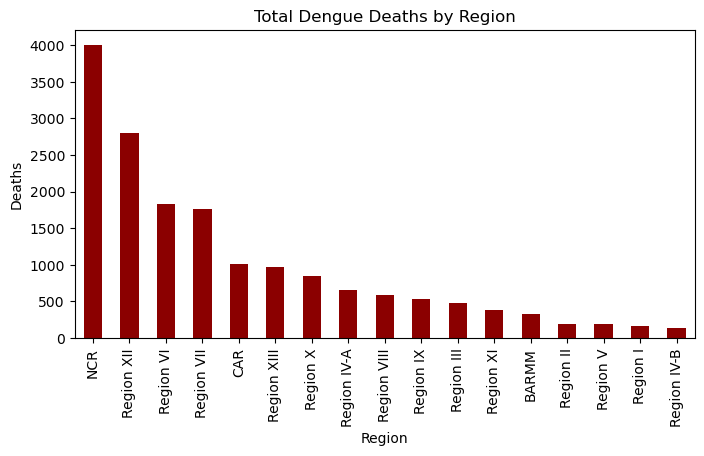

In [9]:
region_deaths = dg.groupby('Region')['Dengue_Deaths'].sum().sort_values(ascending=False)
region_deaths.plot(kind='bar', color='darkred', figsize=(8,4))
plt.title('Total Dengue Deaths by Region')
plt.ylabel('Deaths')
plt.show()


<h1>Insight 4: Identifies which region has the highest mortality rate linked to dengue outbreaks.<h1>

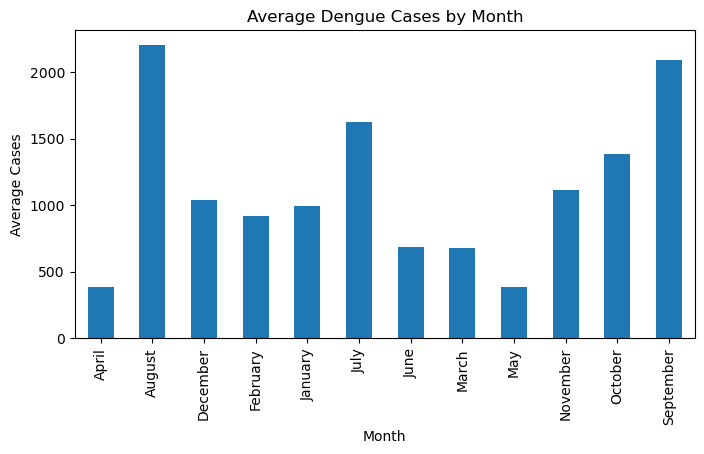

In [10]:
cases_per_month = dg.groupby('Month')['Dengue_Cases'].mean()
cases_per_month.plot(kind='bar', figsize=(8,4))
plt.title('Average Dengue Cases by Month')
plt.ylabel('Average Cases')
plt.show()


<h1>Insight 5: Highlights peak dengue months usually during or after rainy seasons.<h1>

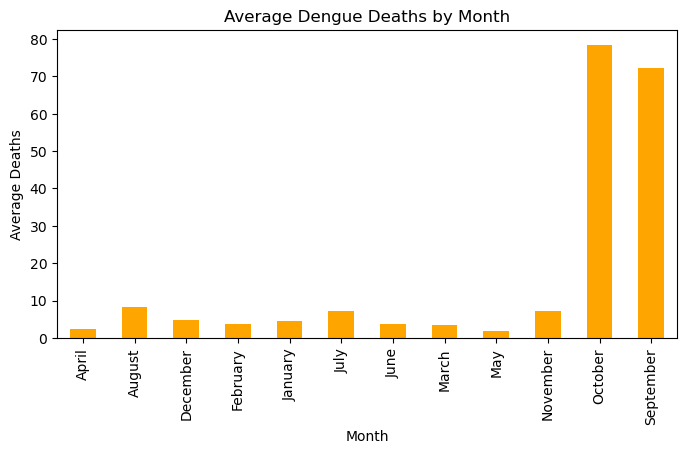

In [11]:
deaths_per_month = dg.groupby('Month')['Dengue_Deaths'].mean()
deaths_per_month.plot(kind='bar', color='orange', figsize=(8,4))
plt.title('Average Dengue Deaths by Month')
plt.ylabel('Average Deaths')
plt.show()


<h1>Insight 6: Shows months with the most fatal dengue outcomes critical for hospital readiness.<h1>

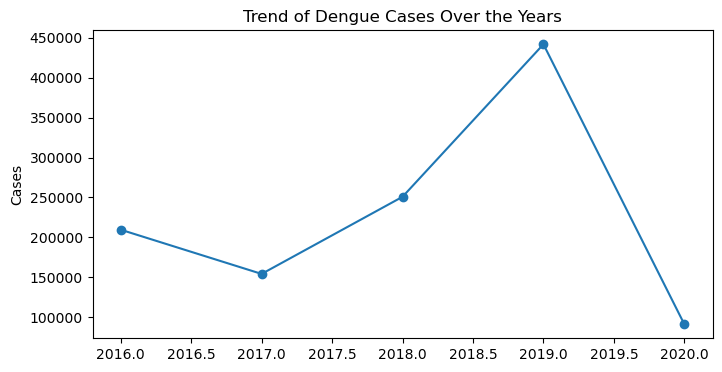

In [13]:
plt.figure(figsize=(8,4))
plt.plot(cases_per_year.index, cases_per_year.values, marker='o')
plt.title('Trend of Dengue Cases Over the Years')
plt.ylabel('Cases')
plt.show()


<h1>Insight 7: Reveals whether dengue cases are increasing or decreasing over time.<h1>

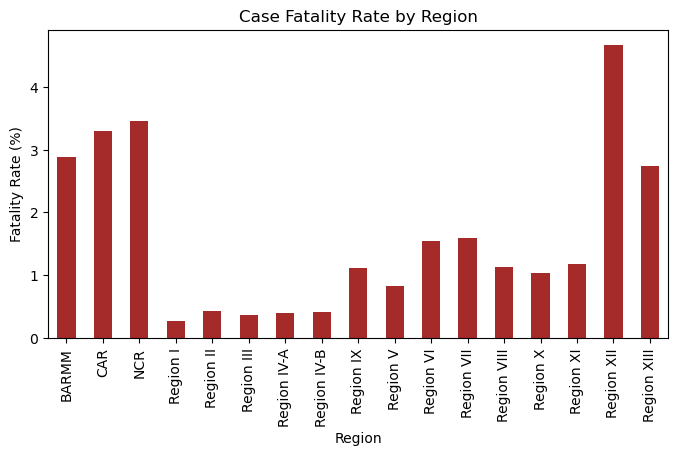

In [15]:
dg_region = dg.groupby('Region')[['Dengue_Cases','Dengue_Deaths']].sum()
dg_region['Fatality_Rate_%'] = (dg_region['Dengue_Deaths'] / dg_region['Dengue_Cases']) * 100
dg_region['Fatality_Rate_%'].plot(kind='bar', color='brown', figsize=(8,4))
plt.title('Case Fatality Rate by Region')
plt.ylabel('Fatality Rate (%)')
plt.show()


<h1>Insight 8: Identifies where dengue is deadlier, regardless of total cases.<h1>

In [16]:
total_cases = dg['Dengue_Cases'].sum()
total_deaths = dg['Dengue_Deaths'].sum()
print(f"Total Dengue Cases: {total_cases:,}")
print(f"Total Dengue Deaths: {total_deaths:,}")


Total Dengue Cases: 1,147,425
Total Dengue Deaths: 16,844


<h1>Insight 9: Gives the big picture the overall dengue burden in your entire dataset.<h1>

In [17]:
avg_cases = dg['Dengue_Cases'].mean()
avg_deaths = dg['Dengue_Deaths'].mean()
print(f"Average Cases per Record: {avg_cases:.2f}")
print(f"Average Deaths per Record: {avg_deaths:.2f}")


Average Cases per Record: 1124.93
Average Deaths per Record: 16.51


<h1>Insight 10: Useful for understanding the dataset’s baseline infection and fatality levels per month-region pair.<h1>

In [18]:
fatality_rate_region = (dg.groupby('Region')['Dengue_Deaths'].sum() /
                        dg.groupby('Region')['Dengue_Cases'].sum()) * 100
max_fatal_region = fatality_rate_region.idxmax()
print(f"Region with the highest average fatality rate: {max_fatal_region}")
print(f"Fatality Rate: {fatality_rate_region[max_fatal_region]:.2f}%")


Region with the highest average fatality rate: Region XII
Fatality Rate: 4.68%


<h1>Insight 11: Identifies the most high-risk region where dengue is most lethal relative to infections.<h1>

In [19]:
fatality_rate_year = (dg.groupby('Year')['Dengue_Deaths'].sum() /
                      dg.groupby('Year')['Dengue_Cases'].sum()) * 100
max_fatal_year = fatality_rate_year.idxmax()
print(f"Year with highest fatality rate: {max_fatal_year}")
print(f"Fatality Rate: {fatality_rate_year[max_fatal_year]:.2f}%")


Year with highest fatality rate: 2016
Fatality Rate: 3.88%


<h1>Insight 12: Pinpoints the deadliest year in terms of dengue severity.<h1>

In [20]:
death_var = dg.groupby('Region')['Dengue_Deaths'].var().sort_values()
print("Regions ranked by consistency of deaths (low variance = consistent):")
print(death_var)


Regions ranked by consistency of deaths (low variance = consistent):
Region
Region I           8.748870
Region IV-B        9.700565
Region V          10.891243
Region II         19.765819
Region IV-A      108.524294
Region III       244.948023
Region XI        272.348870
BARMM            365.812429
Region IX        707.439548
Region VIII     1239.139831
Region X        2195.202260
Region XIII     5297.210169
CAR             6561.044068
Region VII      9245.209040
Region VI      13927.501412
Region XII     43710.413559
NCR            71368.806780
Name: Dengue_Deaths, dtype: float64


<h1>Insight 13: Regions with low variance experience steady (though possibly high) dengue death rates signaling chronic presence.<h1>

In [21]:
top3_regions = region_cases.head(3)
print("Top 3 Regions with Highest Total Cases:")
print(top3_regions)


Top 3 Regions with Highest Total Cases:
Region
Region IV-A    163029
Region III     131064
Region VI      117523
Name: Dengue_Cases, dtype: int64


<h1>Insight 14: Identifies priority regions for intensified dengue control campaigns.<h1>

In [23]:
max_death_record = dg.loc[dg['Dengue_Deaths'].idxmax()]
print("Month–Region with Highest Dengue Deaths:")
print(max_death_record[['Month','Year','Region','Dengue_Deaths']])


Month–Region with Highest Dengue Deaths:
Month            October
Year                2016
Region               NCR
Dengue_Deaths       1651
Name: 849, dtype: object


<h1>Insight 15: Reveals the specific month, year, and region combination where dengue was most fatal a peak outbreak moment.<h1>